In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from mlflow import MlflowClient
import mlflow
import numpy as np
import pandas as pd

In [3]:
client = MlflowClient(tracking_uri="http://192.168.1.181:5010")
mlflow.set_tracking_uri("http://192.168.1.181:5010")


In [4]:
experiment_id = client.get_experiment_by_name("optimal-centroids-complexity-linearity").experiment_id

In [14]:
runs = mlflow.search_runs(experiment_ids=experiment_id)

In [15]:
runs = runs[runs.status == "FINISHED"]

In [25]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rf_test_acc,metrics.test_acc,metrics.dt_test_acc,metrics.train_acc,...,params.dataset,params.data_shuffle_random_state,params.n_gen,params.complexity_measure,params.pop_size,params.base_clf,params.should_take_test,tags.mlflow.runName,tags.exception,elapsed
344,012ef9cbd69048bab37c337f4df6b6d6,26,FINISHED,mlflow-artifacts:/26/012ef9cbd69048bab37c337f4...,2024-06-03 16:54:23.703000+00:00,2024-06-08 09:51:52.543000+00:00,0.645022,0.536797,0.619048,0.757576,...,saheart,99,50,l2,50,svm,False,caring-whale-352,None,4 days 16:57:28.840000
345,ac1a57ddd2e54d0ba5a0145f01e9a35d,26,FINISHED,mlflow-artifacts:/26/ac1a57ddd2e54d0ba5a0145f0...,2024-06-03 16:54:23.693000+00:00,2024-06-08 09:50:40.556000+00:00,0.645022,0.623377,0.619048,0.735931,...,saheart,99,50,l2,50,svm,False,selective-swan-405,None,4 days 16:56:16.863000
346,efd6a641c1c64fab93dc39a5c83796aa,26,FINISHED,mlflow-artifacts:/26/efd6a641c1c64fab93dc39a5c...,2024-06-03 16:54:23.654000+00:00,2024-06-08 09:48:04.757000+00:00,0.645022,0.536797,0.619048,0.757576,...,saheart,99,50,l2,50,svm,True,masked-fawn-870,None,4 days 16:53:41.103000
347,4dcf3360d6784c1282cdd882e57ec206,26,FINISHED,mlflow-artifacts:/26/4dcf3360d6784c1282cdd882e...,2024-06-03 16:54:23.543000+00:00,2024-06-08 09:47:15.651000+00:00,0.645022,0.623377,0.619048,0.735931,...,saheart,99,50,l2,50,svm,True,righteous-ant-960,None,4 days 16:52:52.108000
353,6773aae317194d00a2ba0f8ea8a589d1,26,FINISHED,mlflow-artifacts:/26/6773aae317194d00a2ba0f8ea...,2024-06-03 16:54:23.404000+00:00,2024-06-08 09:44:46.210000+00:00,1.000000,0.998937,1.000000,1.000000,...,mushroom,99,50,l2,50,svm,False,selective-eel-830,None,4 days 16:50:22.806000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,a6db2c02f0d546fdb58400f6b6aa60d4,26,FINISHED,mlflow-artifacts:/26/a6db2c02f0d546fdb58400f6b...,2024-06-03 16:51:30.643000+00:00,2024-06-03 16:59:52.267000+00:00,0.852564,0.855769,0.791667,0.926518,...,balance,42,50,l1,50,knn,True,bemused-dog-813,None,0 days 00:08:21.624000
3834,f4924d4e7f164f0a9e29b1e581ec372b,26,FINISHED,mlflow-artifacts:/26/f4924d4e7f164f0a9e29b1e58...,2024-06-03 16:51:30.641000+00:00,2024-06-03 17:16:25.732000+00:00,0.886415,0.876226,0.856604,0.929057,...,banana,42,50,l1,50,knn,True,bouncy-bird-649,None,0 days 00:24:55.091000
3835,01282828b10245f98da1f6c80f5a7bc1,26,FINISHED,mlflow-artifacts:/26/01282828b10245f98da1f6c80...,2024-06-03 16:51:30.639000+00:00,2024-06-03 16:59:54.199000+00:00,0.852564,0.826923,0.791667,0.888179,...,balance,42,50,l1,50,knn,True,exultant-steed-79,None,0 days 00:08:23.560000
3837,9cf659114cf644e7a15a745557cc8f8e,26,FINISHED,mlflow-artifacts:/26/9cf659114cf644e7a15a74555...,2024-06-03 16:51:30.634000+00:00,2024-06-03 17:14:55.223000+00:00,0.886415,0.875849,0.856604,0.929434,...,banana,42,50,l1,50,knn,True,delicate-yak-863,None,0 days 00:23:24.589000


In [16]:
runs['elapsed'] = runs['end_time'] - runs['start_time']

In [26]:
runs['elapsed'].lt(pd.Timedelta(hours=5))

344     False
345     False
346     False
347     False
353     False
        ...  
3833     True
3834     True
3835     True
3837     True
3839     True
Name: elapsed, Length: 2646, dtype: bool

In [28]:
runs[runs['elapsed'].lt(pd.Timedelta(hours=12))].groupby('params.dataset')['elapsed'].mean()

params.dataset
balance       0 days 05:29:27.830035714
banana        0 days 05:44:28.552428571
coil2000      0 days 07:12:29.808041666
dermatology   0 days 05:52:38.372727272
flare            0 days 07:44:34.429750
housevotes    0 days 05:55:43.822769230
mushroom         0 days 06:09:33.199840
saheart          0 days 05:50:59.259000
thyroid          0 days 06:53:17.935300
tic-tac-toe   0 days 06:16:08.540416666
wdbc          0 days 06:02:24.867944444
wine             0 days 06:07:29.148500
wisconsin        0 days 06:09:55.312450
zoo              0 days 06:10:40.133300
Name: elapsed, dtype: timedelta64[ns]

In [67]:
finished_df = runs[runs.status == "FINISHED"]\
    .drop(['experiment_id', 'status', 'run_id', 'artifact_uri', 'start_time', 'end_time', 'tags.mlflow.runName', 'tags.exception'], axis=1)

In [68]:
finished_df

,metrics.dt_test_acc,metrics.test_acc,metrics.rf_test_acc,metrics.train_acc,params.should_take_test,params.subspaces,params.complexity_measure,params.n_gen,params.base_clf,params.pop_size,params.data_shuffle_random_state,params.dataset
1764,0.956897,0.948276,0.982759,1.000000,False,10,l1,50,dt,50,22,housevotes
1765,0.956897,0.931034,0.982759,1.000000,False,5,l1,50,dt,50,22,housevotes
1766,0.956897,0.948276,0.982759,1.000000,True,10,l1,50,dt,50,22,housevotes
1767,0.956897,0.931034,0.982759,1.000000,True,5,l1,50,dt,50,22,housevotes
1769,0.726079,0.726079,0.735460,0.864916,False,5,l1,50,dt,50,22,flare
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,0.791667,0.855769,0.852564,0.926518,True,10,l1,50,knn,50,42,balance
3834,0.856604,0.876226,0.886415,0.929057,True,5,l1,50,knn,50,42,banana
3835,0.791667,0.826923,0.852564,0.888179,True,5,l1,50,knn,50,42,balance
3837,0.856604,0.875849,0.886415,0.929434,True,10,l1,50,knn,50,42,banana


In [69]:
finished_df['diff-to-dt'] = finished_df['metrics.test_acc'] - finished_df['metrics.dt_test_acc']
finished_df['diff-to-rf'] = finished_df['metrics.test_acc'] - finished_df['metrics.rf_test_acc']
finished_df['better-equal-rf'] = finished_df['metrics.test_acc'] >= finished_df['metrics.rf_test_acc']
finished_df['better-dt'] = finished_df['metrics.test_acc'] > finished_df['metrics.dt_test_acc']

<Axes: xlabel='better-equal-rf'>

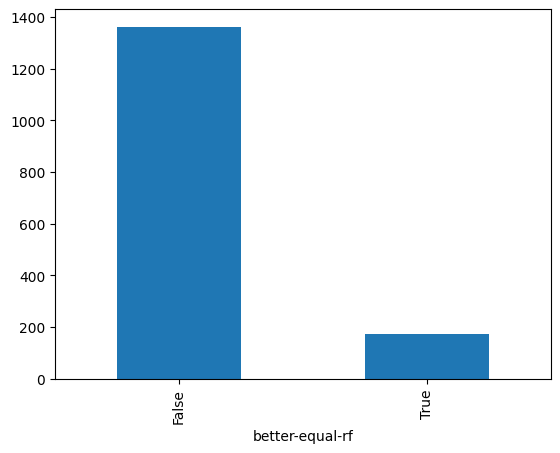

In [70]:
finished_df['better-equal-rf'].value_counts().plot(kind='bar')

<Axes: xlabel='better-dt'>

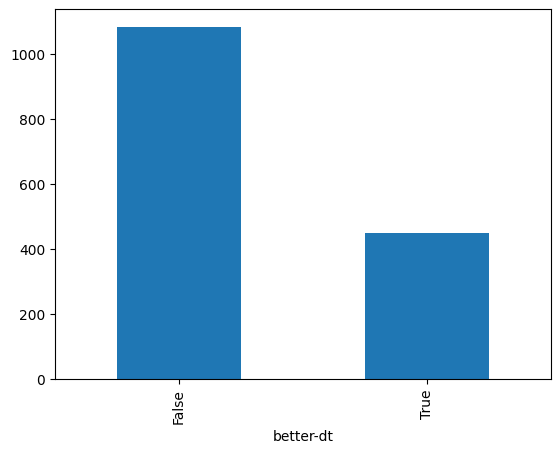

In [71]:
finished_df['better-dt'].value_counts().plot(kind='bar')

In [72]:
finished_df.query('`params.dataset` == "banana"')[['metrics.dt_test_acc', 'params.base_clf']]

,metrics.dt_test_acc,params.base_clf
1780,0.868302,dt
1781,0.868302,dt
1782,0.868302,dt
1783,0.868302,dt
1844,0.855849,dt
...,...,...
3767,0.855849,knn
3828,0.856604,knn
3829,0.856604,knn
3834,0.856604,knn


In [73]:
import itertools
from scipy.stats import wilcoxon
from collections import defaultdict

In [75]:
columns = list(set(finished_df['params.base_clf']))
column_combinations = itertools.permutations(columns, 2)
final_df = defaultdict(lambda: defaultdict(list))
final_test_df = defaultdict(lambda: defaultdict(list))
for dataset in set(finished_df['params.dataset']):
    for base_clf in columns:
        final_df[dataset][base_clf] = np.mean(finished_df.query(f"`params.base_clf` == '{base_clf}' and `params.dataset` == '{dataset}'")['metrics.test_acc'])

    for c1, c2 in column_combinations:
        if final_df[dataset][c1] > final_df[dataset][c2]:
            final_test_df[dataset][c1].append(c2)

In [76]:
pd.DataFrame(final_df)

,balance,dermatology,flare,wdbc,wisconsin,tic-tac-toe,housevotes,wine,saheart,banana,coil2000,thyroid,zoo,mushroom
knn,0.829487,0.804469,0.701220,0.919894,0.918988,0.786708,0.899867,0.862493,0.594805,0.877333,0.930632,0.967678,0.830000,0.995697
dt,0.804487,0.864525,0.724203,0.907277,0.898338,0.807411,0.935345,0.792135,0.625541,0.866604,0.889296,0.993796,0.913333,0.999026
bayes,0.788248,0.850236,0.659850,0.912705,0.915746,0.713779,0.878079,0.826517,0.673882,0.727660,0.183843,0.484465,0.927500,0.928192


In [77]:
pd.DataFrame(final_test_df)

,balance
dt,[bayes]
knn,"[dt, bayes]"


In [65]:
finished_df.groupby(['params.dataset', 'params.base_clf']).apply(func)

      metrics.dt_test_acc  metrics.test_acc  metrics.rf_test_acc  \
2424             0.759615          0.730769             0.823718   
2425             0.759615          0.823718             0.823718   
2426             0.759615          0.730769             0.823718   
2427             0.759615          0.823718             0.823718   
2488             0.775641          0.724359             0.820513   
2489             0.775641          0.810897             0.820513   
2490             0.775641          0.724359             0.820513   
2491             0.775641          0.810897             0.820513   
2552             0.791667          0.730769             0.852564   
2553             0.791667          0.810897             0.852564   
2554             0.791667          0.730769             0.852564   
2555             0.791667          0.810897             0.852564   
2616             0.810897          0.766026             0.858974   
2617             0.810897          0.817308     

""


In [31]:
finished_df[['params.dataset_name','params.dataset_name', 'better-dt', 'better-equal-rf']]

,params.dataset_name,params.dataset_name,better-dt,better-equal-rf
0,shuttle,shuttle,False,False
1,wine,wine,False,False
3,wisconsin,wisconsin,False,False
4,haberman,haberman,True,False
5,titanic,titanic,False,True
...,...,...,...,...
91,heart,heart,True,True
92,heart,heart,False,False
93,heart,heart,True,True
94,heart,heart,False,False


In [33]:
finished_df.groupby(["params.n_clf"]) \
    ['better-equal-rf'] \
    .apply(lambda x: np.sum(x)/len(x)) 

params.n_clf
10    0.250000
20    0.136364
3     0.250000
5     0.208333
Name: better-equal-rf, dtype: float64